In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import libraries

In [114]:
df=pd.read_csv("/Users/uk/Downloads/JOB DESCRIPTION /porter_delivery_analysis/data/processed/porter_cleaned.csv")
# import the clean dataset

In [115]:
df.shape

(194816, 15)

# Delivery Performance Analysis

In [14]:
df['delivery_duration_minute'].describe()
# As we can see here average delivery time is 47.5 minute

count    194816.000000
mean         47.543993
std          18.039921
min           1.683333
25%          35.066667
50%          44.333333
75%          56.333333
max         179.850000
Name: delivery_duration_minute, dtype: float64

<Axes: xlabel='delivery_duration_minute', ylabel='Count'>

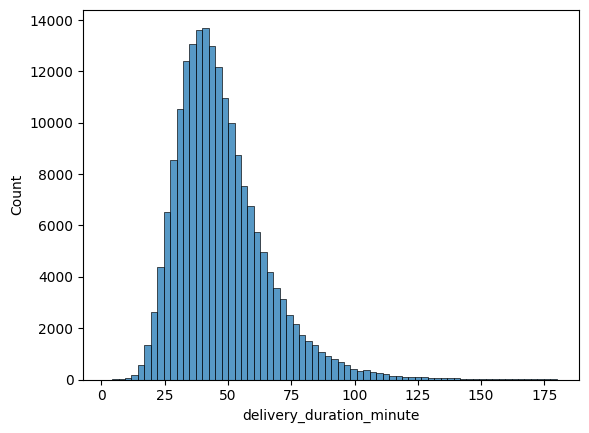

In [21]:
sns.histplot(df['delivery_duration_minute'],bins=70)
# distribution of delivery time, as we can see most deliveries duration time falls between 25-75 minute

In [19]:
df.groupby('market_id')['delivery_duration_minute'].mean().sort_values()
# Average delivery time as per market, so as we can see the lowest and fasest delivery time is in market_id 2 followed by 5 and 6

market_id
2.0    45.964162
5.0    46.383392
6.0    47.051698
4.0    47.118678
3.0    47.523841
1.0    51.114276
Name: delivery_duration_minute, dtype: float64

In [25]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

### Line Plot of Mean Delivery Time

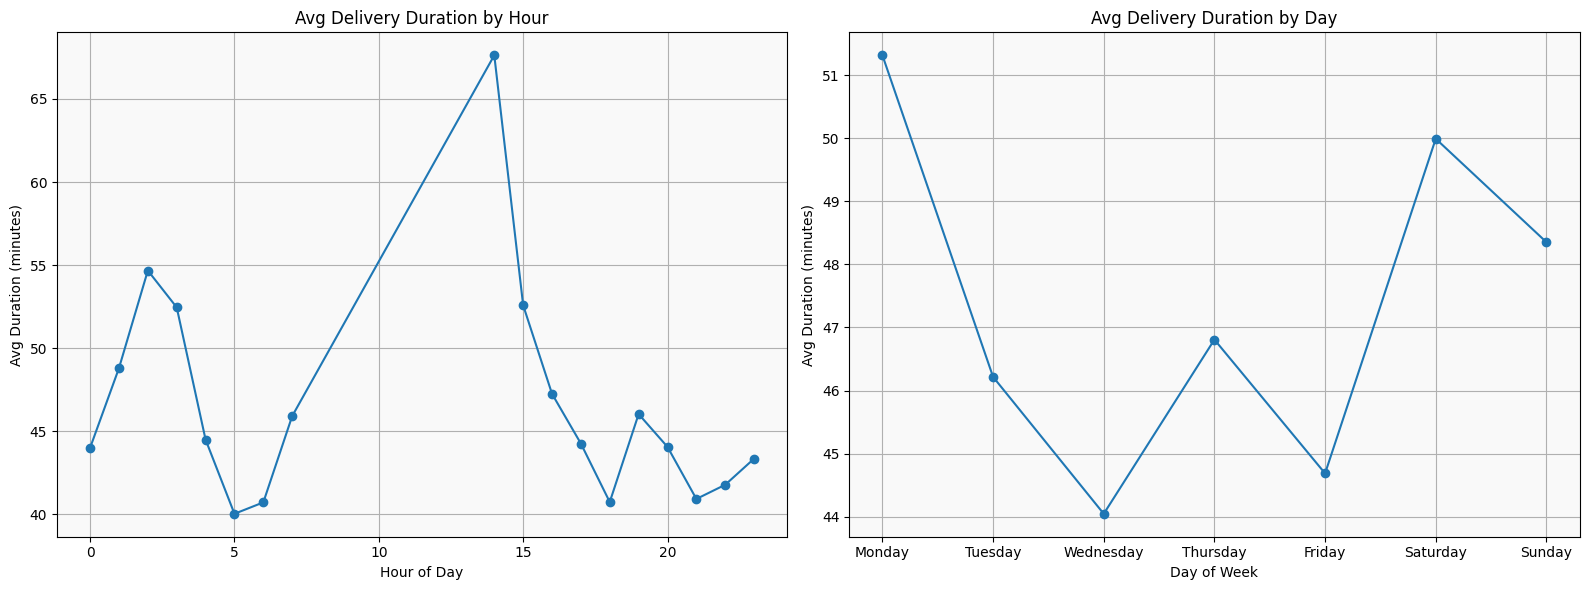

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6)) 

df.groupby('hour')['delivery_duration_minute'].mean().plot(
    kind='line', marker='o', ax=axes[0])
axes[0].set_title("Avg Delivery Duration by Hour")
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Avg Duration (minutes)")
axes[0].grid(True)

# Average Delivery Duration is highest during 10 AM - 3 PM

df.groupby('day')['delivery_duration_minute'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(kind='line', marker='o', ax=axes[1])
axes[1].set_title("Avg Delivery Duration by Day")
axes[1].set_xlabel("Day of Week")
axes[1].set_ylabel("Avg Duration (minutes)")
axes[1].grid(True)

# As we can see here Average Delivery Duration is highest on Monday and lowest on Wednesday (Deliveries are delivered faster on Wednesday compared to other days)

plt.tight_layout()
plt.show()

### Bar Plot of Median Delivery Time

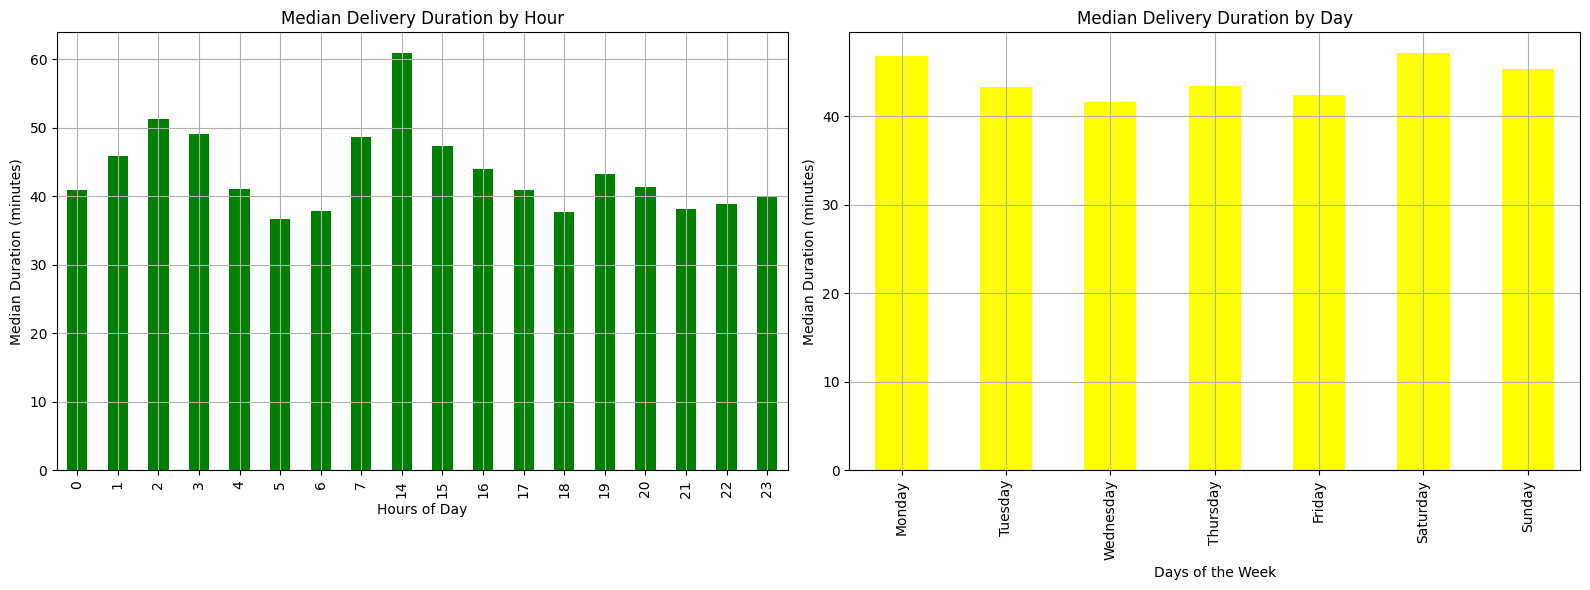

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6)) 

df.groupby('hour')['delivery_duration_minute'].median().plot(
    kind='bar', color='green', ax=axs[0])
axs[0].set_title("Median Delivery Duration by Hour")
axs[0].set_xlabel("Hours of Day")
axs[0].set_ylabel("Median Duration (minutes)")
axs[0].grid(True)

# Delivery time peak duing midday hours

df.groupby('day')['delivery_duration_minute'].median().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).plot(kind='bar', color='yellow', ax=axs[1])
axs[1].set_title("Median Delivery Duration by Day")
axs[1].set_xlabel("Days of the Week")
axs[1].set_ylabel("Median Duration (minutes)")
axs[1].grid(True)

# Delivery time shows no notable differences across days of the week

plt.tight_layout()
plt.show()

# Operational Partner Analysis

In [61]:
df[['total_onshift_partners','total_busy_partners']].describe()
# Describing to see the stats like mean,min,max etc

,total_onshift_partners,total_busy_partners
count,194816.000000,194816.000000
mean,41.122747,38.305509
std,35.296933,32.863691
min,-4.000000,-4.000000
25%,13.000000,11.000000
50%,32.000000,30.000000
75%,62.000000,59.000000
max,171.000000,154.000000


In [62]:
df[['total_onshift_partners', 'total_busy_partners']] = df[['total_onshift_partners', 'total_busy_partners']].clip(lower=0)  
# since min was -4 for both total_onshift_partners and total_busy_partner which is error entery, so we replaced it with 0

In [63]:
df[['total_onshift_partners','total_busy_partners']].describe()

,total_onshift_partners,total_busy_partners
count,194816.000000,194816.000000
mean,41.122906,38.305642
std,35.296742,32.863531
min,0.000000,0.000000
25%,13.000000,11.000000
50%,32.000000,30.000000
75%,62.000000,59.000000
max,171.000000,154.000000


### Partner Utilization Rate

In [69]:
df['utilization_rate'] = df['total_busy_partners'] / (df['total_onshift_partners'] + 1)  
print(df['utilization_rate'].describe())  

# Most of the time, 9/10 delivery partners are busy ahndling orders, but also there are moments when 3/10 are free, peak hours are likely to stretch them thin

count    194816.000000
mean          0.813176
std           0.420551
min           0.000000
25%           0.707692
50%           0.900000
75%           0.976471
max          29.000000
Name: utilization_rate, dtype: float64


Text(0.5, 0, 'Utilization Rate (Busy/OnShift)')

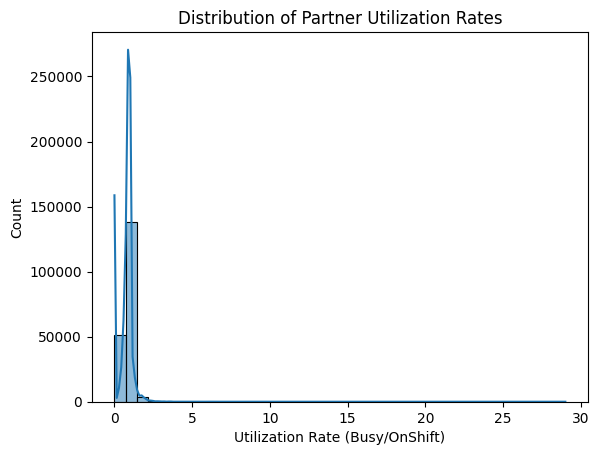

In [70]:
sns.histplot(df['utilization_rate'].dropna(),bins=40,kde=True)
plt.title("Distribution of Partner Utilization Rates")
plt.xlabel("Utilization Rate (Busy/OnShift)")

# Most deliveery partners are heavily utilized (almost 100% busy), but extreme outliers (5-30x) suggests data errors or rare crises scenarios

# Order and Partner Insights

In [79]:
df['total_items'].describe()

count    194816.000000
mean          3.203587
std           2.672335
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         411.000000
Name: total_items, dtype: float64

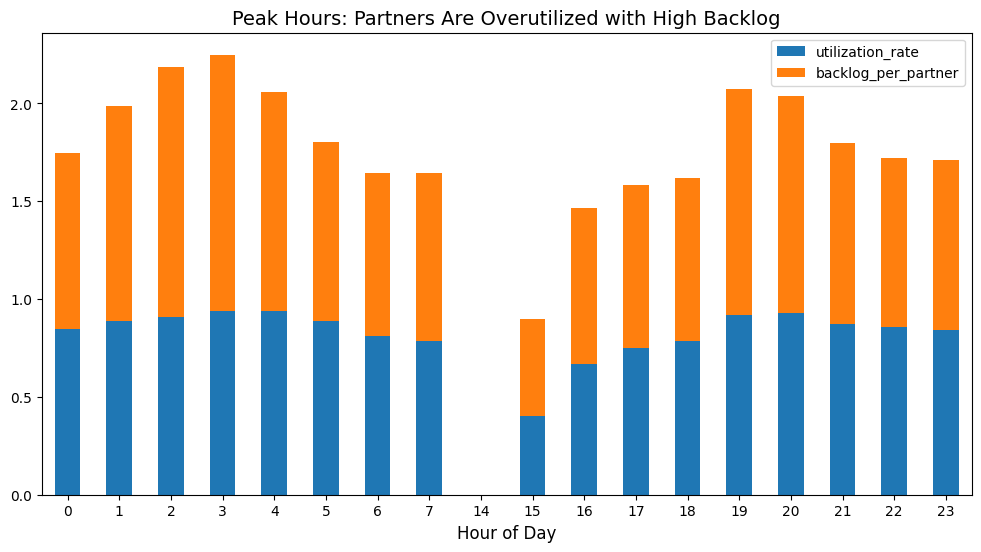

In [83]:
df['backlog_per_partner'] = df['total_outstanding_orders'] / (df['total_onshift_partners'] + 1)  

# Utilization and backlog per partner

df['hour'] = pd.to_datetime(df['created_at']).dt.hour  
hourly_stats = df.groupby('hour').agg({  
    'utilization_rate': 'median',  
    'backlog_per_partner': 'median'  
})  

hourly_stats.plot(kind='bar', stacked=True, figsize=(12, 6))  
plt.title("Peak Hours: Partners Are Overutilized with High Backlog", fontsize=14)  
plt.xlabel("Hour of Day", fontsize=12)  
_ = plt.xticks(rotation=0)  

# partners are overutilized with high backlogs from 2 PM - 11 PM

# Store and Category Insight

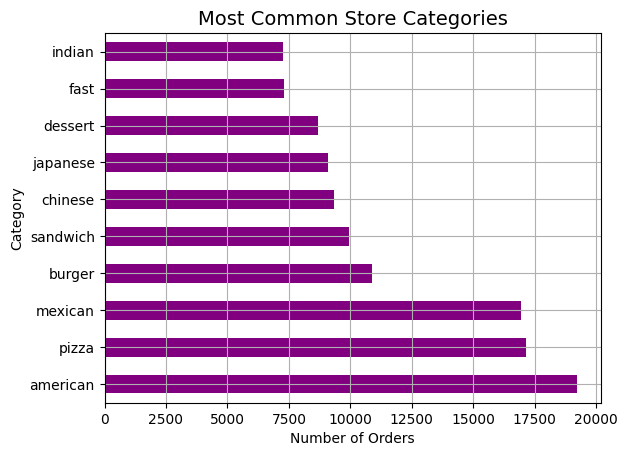

In [89]:
df['store_primary_category'].value_counts().head(10).plot(kind='barh', color = 'purple')
plt.title("Most Common Store Categories",fontsize=14)
plt.xlabel("Number of Orders")
plt.ylabel("Category")
plt.grid(True)
plt.show()

# after looking at this bar chart we can say that Company's most frequently serviced store category is american followed by pizza and mexican category

### Deleivery Time by Catgory

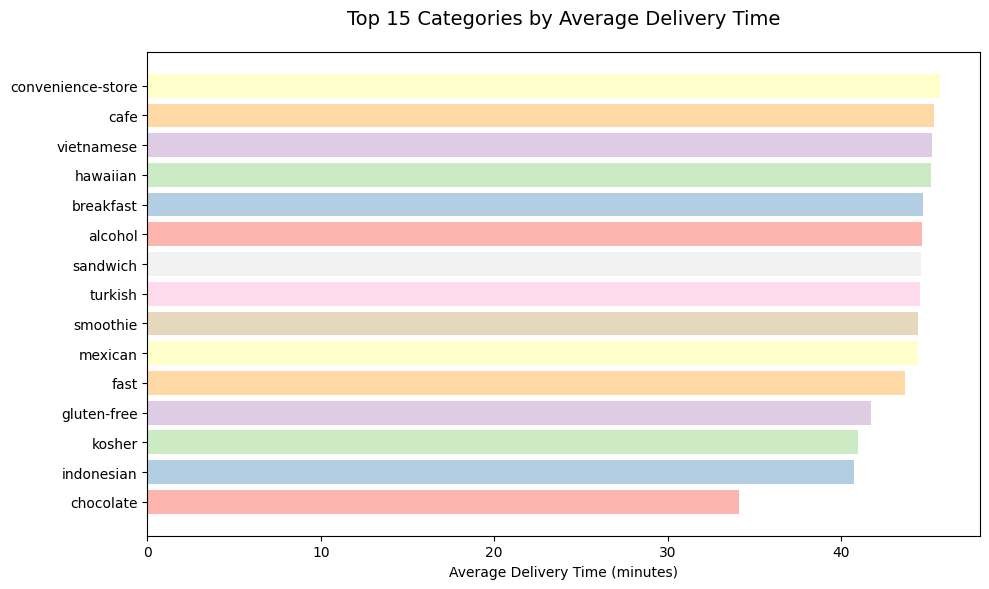

In [117]:
top_15_categories = df.groupby('store_primary_category')['delivery_duration_minute'].mean().sort_values().head(15)
plt.figure(figsize=(10, 6))
plt.barh(top_15_categories.index, top_15_categories, color=plt.cm.Pastel1.colors)
plt.title("Top 15 Categories by Average Delivery Time", fontsize=14, pad=20)
plt.xlabel("Average Delivery Time (minutes)")
plt.tight_layout()
plt.show()

# Convenience stores, cafes, Vietnamese, and Hawaiian food categories show the longest average delivery times among top 15 categories

### Average Delivery Time by Market ID

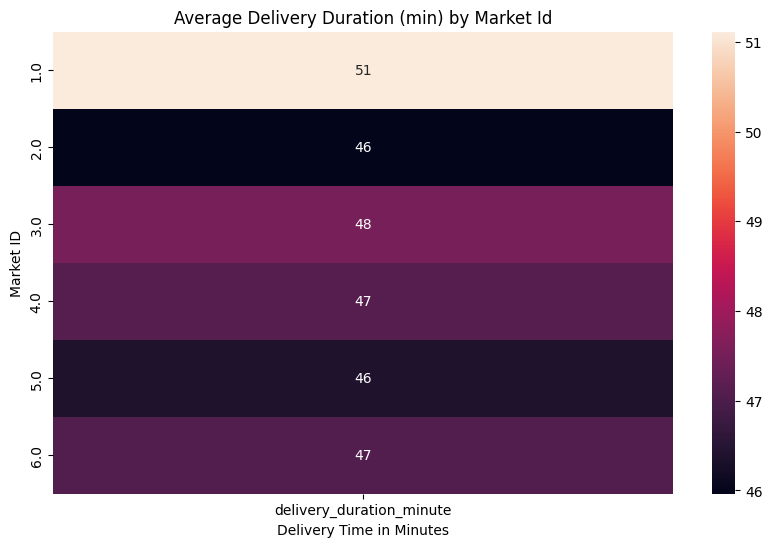

In [107]:
plt.figure(figsize=(10,6))
sns.heatmap(df.pivot_table(index='market_id', values='delivery_duration_minute', aggfunc='mean'), annot=True)
plt.title("Average Delivery Duration (min) by Market Id")
plt.xlabel("Delivery Time in Minutes")
plt.ylabel("Market ID")
plt.show()

# All markets maintain similar delivery speeds (46-51 min), indicating standardized operations. No market requires urgent intervention based on duration alone